In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install statsmodels


In [2]:
import pandas as pd# type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as mticker
from scipy.stats import shapiro, levene
from scipy.stats import t 
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [20]:
df = pd.read_csv("./clean_kaggle_data_2024.csv")
print(f"Our data set has {df.shape[0]} rows and {df.shape[1]} columns. \n")
df.describe()



Our data set has 12209 rows and 112 columns. 



,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
count,12209.000000,12209.000000,12209.000000,1.220900e+04,12166.000000,12134.000000,12160.000000,12172.000000,12188.000000,12189.000000,12191.000000,12186.000000,12190.000000,12186.000000,12209.000000,1.220900e+04
mean,20297.735687,14.303956,9.632075,3.049833e+07,10.765823,19.770026,7.655859,10.775776,25.621767,24.822451,21.672570,17.354325,12.038331,10.855449,6.940126,8.432007e+04
std,11633.678037,9.214786,7.988643,6.564029e+08,8.637580,26.232043,18.502650,22.464719,27.206669,27.316410,26.614071,25.482397,23.802943,22.517018,2.083906,1.861754e+05
min,73.000000,0.000000,0.000000,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000e+02
25%,10146.000000,8.000000,4.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.040400e+04
50%,20167.000000,12.000000,7.000000,1.200000e+05,8.000000,10.000000,0.000000,0.000000,20.000000,20.000000,12.000000,10.000000,0.000000,0.000000,7.000000,6.444400e+04
75%,29948.000000,19.000000,13.000000,3.360000e+05,15.000000,25.000000,5.000000,10.000000,30.000000,30.000000,30.000000,20.000000,10.000000,10.000000,8.000000,1.074060e+05
max,41187.000000,50.000000,50.000000,4.800000e+10,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,10.000000,1.381802e+07


Please note that I mapped each EdLeve to their index in following list.

0     -->     Secondary school
1     -->     Master’s degree
2     -->     Some college/university study without earning a degree
3     -->     Professional degree
4     -->     Bachelor’s degree
5     -->     Associate degree
6     -->     Primary/elementary school
7     -->     Something else


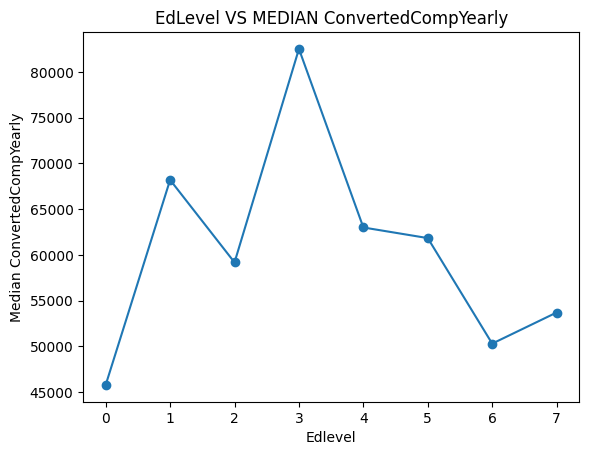

In [4]:
# FIRST FIGURE. 
print("Please note that I mapped each EdLeve to their index in following list.\n")
i = 0
for e in df["EdLevel"].unique():
    print(f"{i}     -->     {e}")
    i += 1
list = []
for e in df["EdLevel"].unique():
    list.append(df[df["EdLevel"] == e]["ConvertedCompYearly"].median())
plt.plot([0, 1, 2, 3, 4, 5, 6, 7], list, marker = "o")
plt.title("EdLevel VS MEDIAN ConvertedCompYearly")
plt.xlabel("Edlevel")
plt.ylabel("Median ConvertedCompYearly")
plt.show()

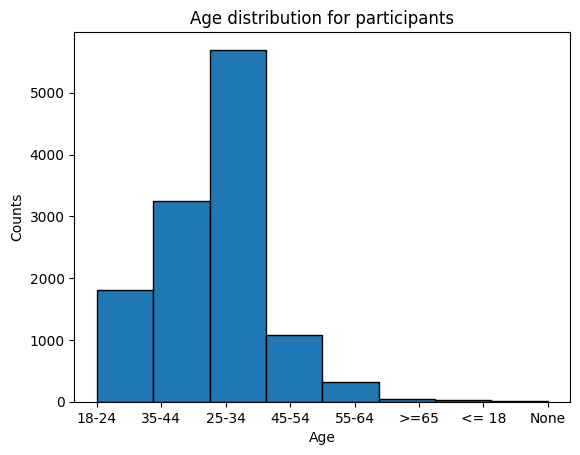

In [5]:
# SECOND FIGURE. 
temp_df = df.copy()
temp_df["Age"] = temp_df["Age"].map({"65 years or older": ">=65", "Prefer not to say": "None", "Under 18" : "<= 18"}).fillna(temp_df["Age"])
plt.hist(temp_df["Age"], edgecolor = "black", bins = 8)
plt.title( "Age distribution for participants")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()

Please note that I mapped each EdLeve to their index in following list.

0     -->     Secondary school
1     -->     Master’s degree
2     -->     Some college/university study without earning a degree
3     -->     Professional degree
4     -->     Bachelor’s degree
5     -->     Associate degree
6     -->     Primary/elementary school
7     -->     Something else


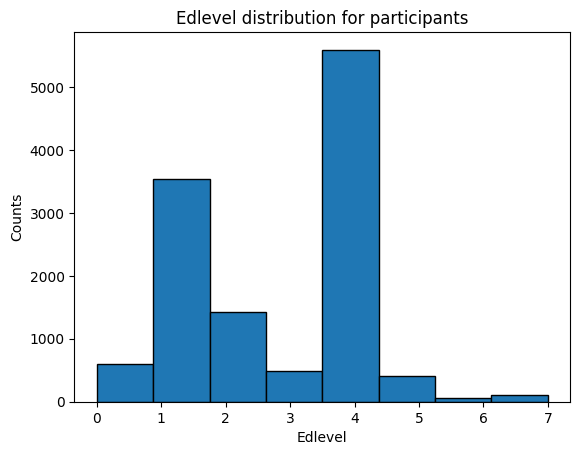

In [6]:
# THIRD FIGUTE. 
temp_df = df.copy()
n = 0
print("Please note that I mapped each EdLeve to their index in following list.\n")
for e in df["EdLevel"].unique():
    print(f"{n}     -->     {e}")
    n += 1
map_0 = {}
p = 0
for i in df["EdLevel"].unique():
    map_0[df["EdLevel"].unique()[p]] = p
    p += 1
temp_df["EdLevel"] = temp_df["EdLevel"].map(map_0)
plt.hist(temp_df["EdLevel"], edgecolor = "black", bins = 8)
plt.title( "Edlevel distribution for participants")
plt.xlabel("Edlevel")
plt.ylabel("Counts")
plt.show()

Question 2 A

Unique values in the column: ['Hybrid' 'Remote' 'In-person']


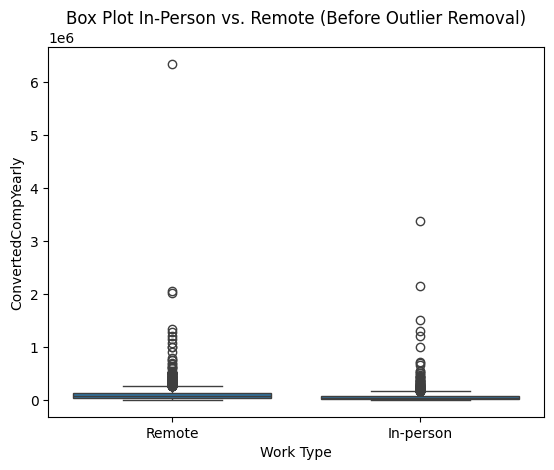

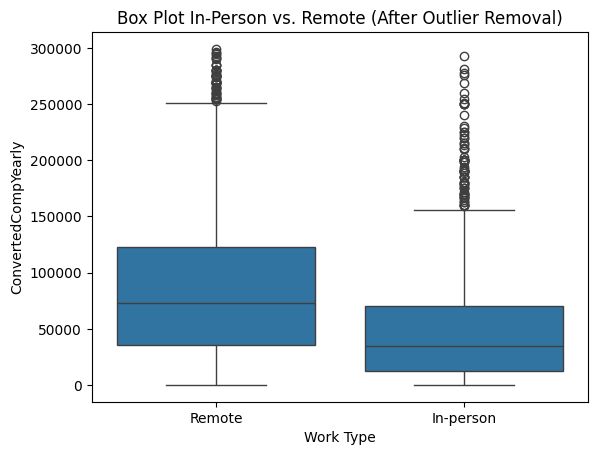

Summary Statistics After Outlier Removal:
In-person:
 count      1918.000000
mean      49329.813347
std       48265.069707
min         123.000000
25%       12648.000000
50%       34901.500000
75%       70000.000000
max      292992.000000
Name: ConvertedCompYearly, dtype: float64
Remote:
 count      4891.000000
mean      84440.881619
std       62551.954994
min         104.000000
25%       35550.000000
50%       72693.000000
75%      122529.500000
max      299000.000000
Name: ConvertedCompYearly, dtype: float64


In [7]:
#Boxplot shows two groups without removing outliers
unique_values = df['RemoteWork'].unique()
print("Unique values in the column:", unique_values)

df_filtered_initial = df[df['RemoteWork'] != 'Hybrid']
sns.boxplot(data=df_filtered_initial, x='RemoteWork', y='ConvertedCompYearly')
plt.title("Box Plot In-Person vs. Remote (Before Outlier Removal)")
plt.xlabel("Work Type")
plt.ylabel("ConvertedCompYearly")
plt.show()

#Remove outliers for ConvertedCompYearly
def remove_outliers(df, column, multiplier=2.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_no_outliers = remove_outliers(df, 'ConvertedCompYearly', multiplier=2.5)

#Seperate two groups and remove Hybrid
df_filtered = df_no_outliers[df_no_outliers['RemoteWork'] != 'Hybrid']
df_In_person = df_filtered[df_filtered['RemoteWork'] == 'In-person']
df_Remote = df_filtered[df_filtered['RemoteWork'] == 'Remote']

df_cleaned = pd.concat([df_Remote, df_In_person])

# Boxplot after removing outliers
sns.boxplot(data=df_cleaned, x='RemoteWork', y='ConvertedCompYearly')
plt.title("Box Plot In-Person vs. Remote (After Outlier Removal)")
plt.xlabel("Work Type")
plt.ylabel("ConvertedCompYearly")
plt.show()

# Summary the data
print("Summary Statistics After Outlier Removal:")
print("In-person:\n", df_In_person['ConvertedCompYearly'].describe())
print("Remote:\n", df_Remote['ConvertedCompYearly'].describe())


Question 2 Part B

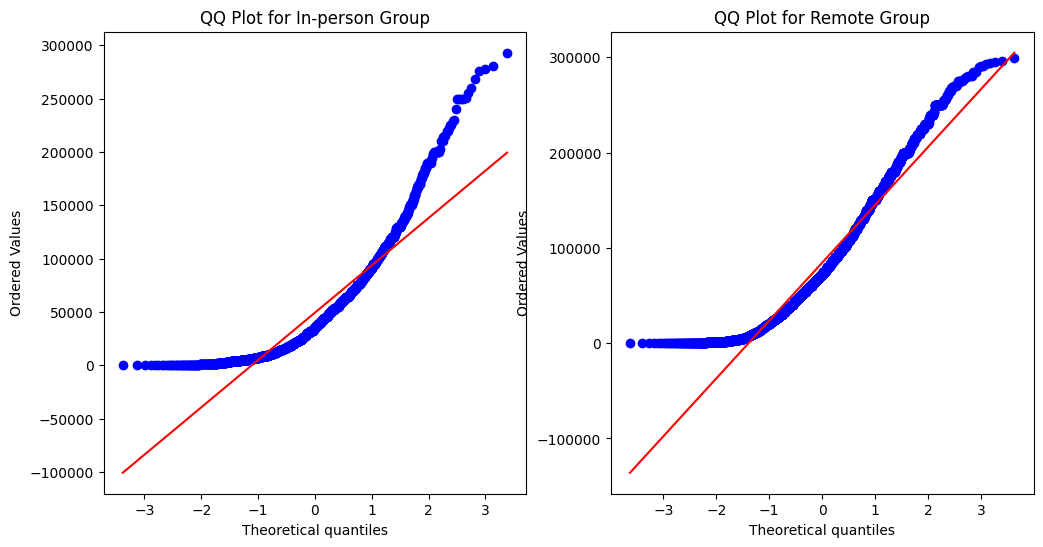

In [8]:
# QQ plot to test the distribution
# Q-Q Plot for In-person Group
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df_In_person['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title("QQ Plot for In-person Group")

# QQ Plot for Remote Group
plt.subplot(1, 2, 2)
stats.probplot(df_Remote['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title("QQ Plot for Remote Group")
plt.show()

In [9]:
# Levene test to show difference variance
levene_stat, levene_p_value = levene(df_In_person['ConvertedCompYearly'], df_Remote['ConvertedCompYearly'])
print("Levene’s Test Statistic:", levene_stat)
print("Levene’s Test P-Value:", levene_p_value)

Levene’s Test Statistic: 196.28146344807936
Levene’s Test P-Value: 5.500964393180365e-44


In [10]:
#Calculation t-test using formula 
# In-person 
n1 = df_In_person.shape[0]  # Sample size
mean_inperson = df_In_person['ConvertedCompYearly'].mean() # mean
var_inperson = df_In_person['ConvertedCompYearly'].var(ddof=1)  # Variance 

#Remote
mean_remote = df_Remote['ConvertedCompYearly'].mean() #mean
var_remote = df_Remote['ConvertedCompYearly'].var(ddof=1)  # Variance
n2 = df_Remote.shape[0]  # Sample size

#pooled_std
pooled_std = np.sqrt(((n1 - 1) * var_inperson + (n2 - 1) * var_remote) / (n1 + n2 - 2))

# Calculate the observed difference in means
observed_diff = mean_inperson - mean_remote

#Welch t-test
t_welch = (mean_inperson - mean_remote) / np.sqrt((var_inperson / n1) + (var_remote / n2))
print("Welch’s t-Test t-statistic:", t_welch)

Welch’s t-Test t-statistic: -24.73748929583997


In [11]:
#t-test using built-in function
tc, pc = stats.ttest_ind(df_In_person['ConvertedCompYearly'], df_Remote[ 'ConvertedCompYearly'], equal_var = False)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -24.7375  p = 8.56174e-127


Question 2 part C

In [12]:
n_bootstrap = 10000  
n1 = df_In_person.shape[0]
n2 = df_Remote.shape[0]

boot_means_inperson = [
    np.mean(np.random.choice(df_In_person['ConvertedCompYearly'], size=n1, replace=True)) for _ in range(n_bootstrap)
    ]
boot_means_remote = [
    np.mean(np.random.choice(df_Remote['ConvertedCompYearly'], size=n2, replace=True))for _ in range(n_bootstrap)
]
boot_diff_means = np.array(boot_means_inperson)-np.array(boot_means_remote)

mean_in_person = np.mean(boot_means_inperson)
mean_remote = np.mean(boot_means_remote)


Fighure 1

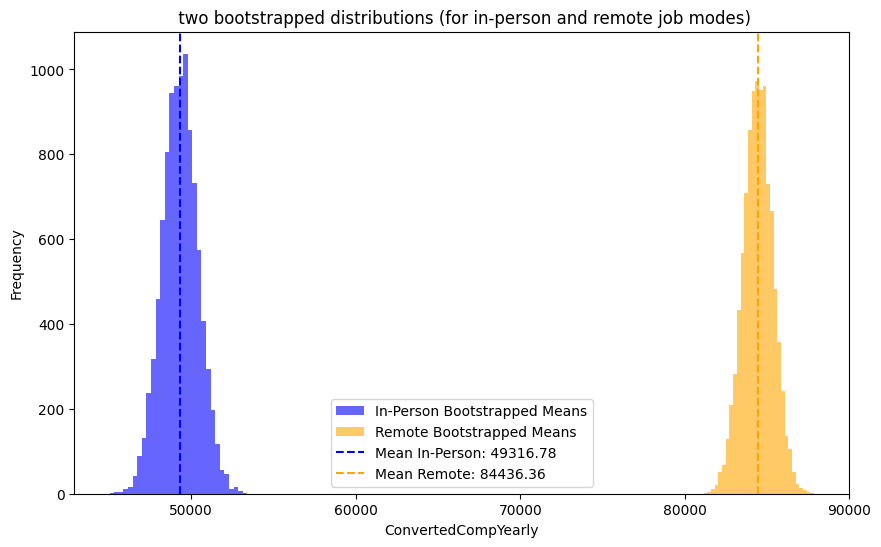

In [13]:
#two bootstrapped distributions
plt.figure(figsize=(10, 6))
plt.hist(boot_means_inperson, bins=30, alpha=0.6, color='blue', label='In-Person Bootstrapped Means')
plt.hist(boot_means_remote, bins=30, alpha=0.6, color='orange', label='Remote Bootstrapped Means')
plt.axvline(mean_in_person, color='blue', linestyle='--', label=f'Mean In-Person: {mean_in_person:.2f}')
plt.axvline(mean_remote, color='orange', linestyle='--', label=f'Mean Remote: {mean_remote:.2f}')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.title(' two bootstrapped distributions (for in-person and remote job modes)')
plt.legend()
plt.show()

Figure 2

-35111.06827206405


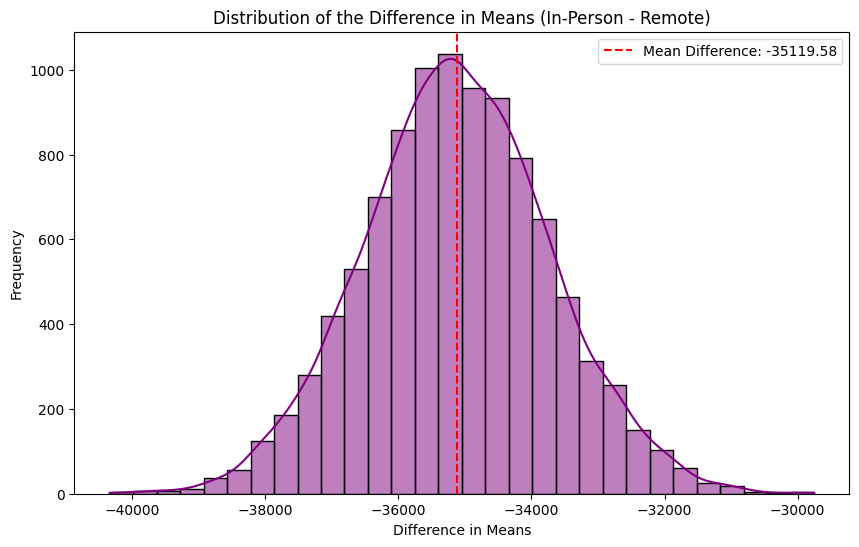

In [14]:
# distribution  of  the  difference  in  means
observed_mean_diff = df_In_person['ConvertedCompYearly'].mean() - df_Remote['ConvertedCompYearly'].mean()
print(observed_mean_diff)
bootstrap_mean_diff = np.mean(boot_diff_means)

plt.figure(figsize=(10, 6))
sns.histplot(boot_diff_means, bins=30, color='purple', kde=True)
plt.axvline(bootstrap_mean_diff, color='red', linestyle='--', label=f'Mean Difference: {bootstrap_mean_diff:.2f}')
plt.title("Distribution of the Difference in Means (In-Person - Remote)")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Figure 3

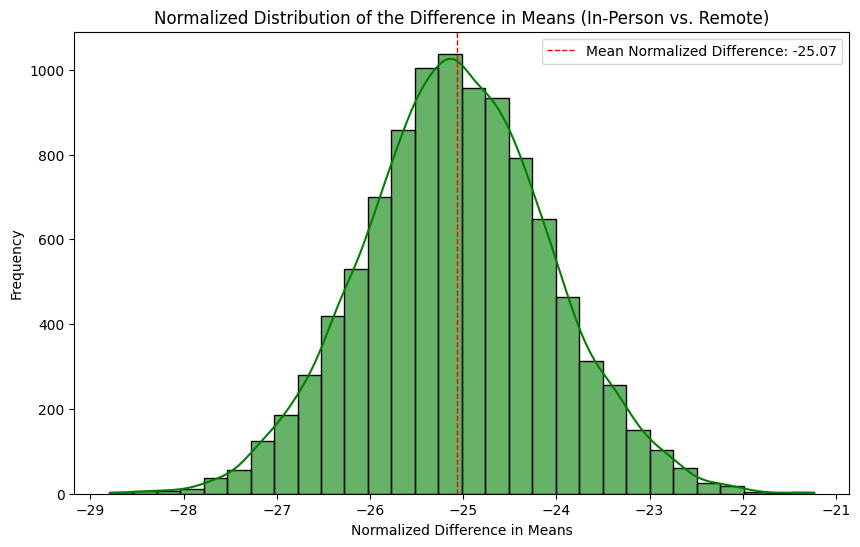

In [15]:
#figure 3 use group 3 formula

# Normalize the difference in means
normalized_diff_means = (boot_diff_means/np.std(boot_diff_means))
mean_standardized_diff = np.mean(normalized_diff_means)
plt.figure(figsize=(10, 6))
sns.histplot(normalized_diff_means, bins=30, color='green', kde=True, edgecolor='black', alpha=0.6)
plt.axvline(mean_standardized_diff, color='red', linestyle='--', linewidth=1, label=f'Mean Normalized Difference: {mean_standardized_diff:.2f}')
plt.title("Normalized Distribution of the Difference in Means (In-Person vs. Remote)")
plt.xlabel("Normalized Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Question 2 Part d

In [16]:
ci_lower = np.percentile(boot_diff_means, 2.5)
ci_upper = np.percentile(boot_diff_means, 97.5)
if ci_lower > 0 or ci_upper < 0:
    print("Reject the null hypothesis: There is a significant difference between in-person and remote salaries.")
else:
    print("Fail to reject the null hypothesis: No significant difference between in-person and remote salaries.")

Reject the null hypothesis: There is a significant difference between in-person and remote salaries.


In [17]:
tc, pc = stats.ttest_ind(boot_means_inperson, boot_means_remote, equal_var = False)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -2483.89  p = 0


Question 3 Part A

Unique values in the column: ['Secondary school' 'Master’s degree'
 'Some college/university study without earning a degree'
 'Professional degree' 'Bachelor’s degree' 'Associate degree'
 'Primary/elementary school' 'Something else']


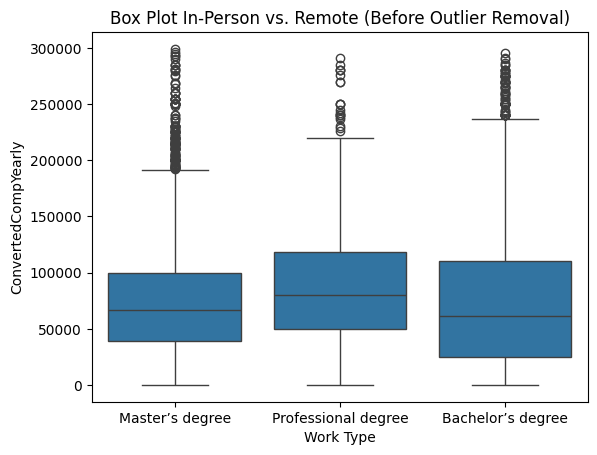

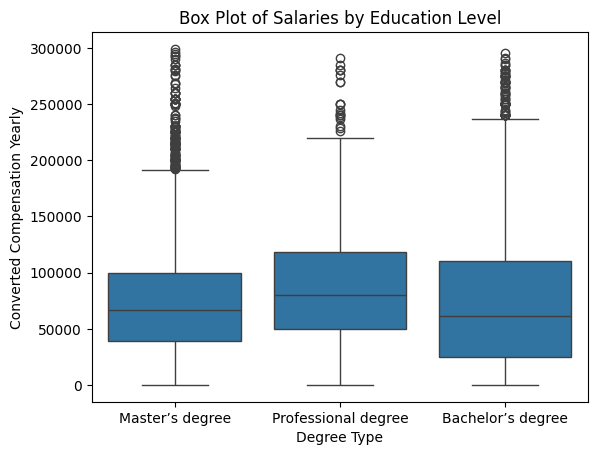

Descriptive Statistics for Master’s degree:
count      3465.000000
mean      76024.190765
std       53444.159348
min         104.000000
25%       39091.000000
50%       66943.000000
75%      100000.000000
max      299000.000000
Name: ConvertedCompYearly, dtype: float64

Descriptive Statistics for Bachelor’s degree:
count      5495.000000
mean      74329.006187
std       59969.115483
min         115.000000
25%       24707.000000
50%       61759.000000
75%      110000.000000
max      295000.000000
Name: ConvertedCompYearly, dtype: float64

Descriptive Statistics for Professional degree:
count       467.000000
mean      91454.927195
std       60280.225638
min         132.000000
25%       49521.500000
50%       79962.000000
75%      118051.000000
max      290772.000000
Name: ConvertedCompYearly, dtype: float64


In [18]:
unique_values = df['EdLevel'].unique()
print("Unique values in the column:", unique_values)

df_filtered = df_no_outliers[df_no_outliers['EdLevel'].isin(['Master’s degree', 'Bachelor’s degree', 'Professional degree'])]
sns.boxplot(data=df_filtered, x='EdLevel', y='ConvertedCompYearly')
plt.title("Box Plot In-Person vs. Remote (Before Outlier Removal)")
plt.xlabel("Work Type")
plt.ylabel("ConvertedCompYearly")
plt.show()

df_masters = df_filtered[df_filtered['EdLevel'] == 'Master’s degree']
df_bachelors = df_filtered[df_filtered['EdLevel'] == 'Bachelor’s degree']
df_professional = df_filtered[df_filtered['EdLevel'] == 'Professional degree']

df_cleaned = pd.concat([df_masters, df_professional, df_bachelors])

# Box Plot after filtering by education level
sns.boxplot(data=df_cleaned, x='EdLevel', y='ConvertedCompYearly')
plt.title("Box Plot of Salaries by Education Level")
plt.xlabel("Degree Type")
plt.ylabel("Converted Compensation Yearly")
plt.show()

# Descriptive Statistics
print("Descriptive Statistics for Master’s degree:")
print(df_masters['ConvertedCompYearly'].describe())
print("\nDescriptive Statistics for Bachelor’s degree:")
print(df_bachelors['ConvertedCompYearly'].describe())
print("\nDescriptive Statistics for Professional degree:")
print(df_professional['ConvertedCompYearly'].describe())

Question 3 Part B

In [19]:
bachelors_salaries = df_bachelors['ConvertedCompYearly']
masters_salaries = df_masters['ConvertedCompYearly']
professional_salaries = df_professional['ConvertedCompYearly']

anova_result = stats.f_oneway(bachelors_salaries, masters_salaries, professional_salaries)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("There is a significant difference in mean salaries across the education levels.")
else:
    print("There is no significant difference in mean salaries across the education levels.")


ANOVA F-statistic: 19.018349053337168
ANOVA p-value: 5.715571531276767e-09
There is a significant difference in mean salaries across the education levels.


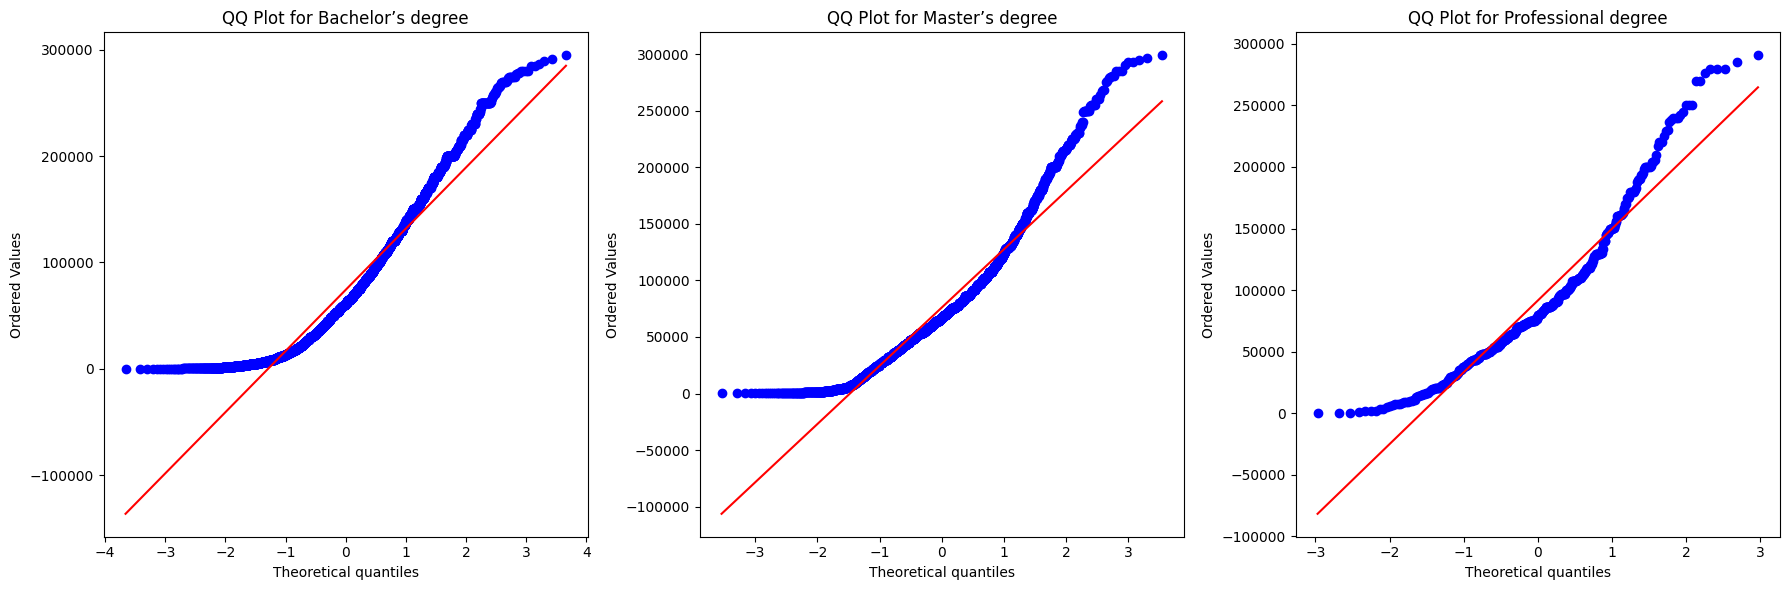

In [20]:
# QQ plot to seet the data distribution
plt.figure(figsize=(18, 6))

# QQ Plot for Bachelor's degree
plt.subplot(1, 3, 1)
stats.probplot(df_bachelors['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title("QQ Plot for Bachelor’s degree")

# QQ Plot for Master's degree
plt.subplot(1, 3, 2)
stats.probplot(df_masters['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title("QQ Plot for Master’s degree")

# QQ Plot for Professional degree
plt.subplot(1, 3, 3)
stats.probplot(df_professional['ConvertedCompYearly'], dist="norm", plot=plt)
plt.title("QQ Plot for Professional degree")


plt.tight_layout()
plt.show()

In [21]:
#Levene's test to see the variance
levene_stat, p_value = levene(bachelors_salaries, masters_salaries, professional_salaries)
print("Levene's Test for Equality of Variances")
print(f"Levene Statistic: {levene_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Levene's Test for Equality of Variances
Levene Statistic: 41.29599612514971
P-value: 1.39158633316155e-18
The variances are significantly different.


Question 3 Part C

In [22]:
n_bootstrap = 10000
n_bachelors = df_bachelors.shape[0]
n_masters = df_masters.shape[0]
n_professional = df_professional.shape[0]

boot_means_bachelors = np.zeros(n_bootstrap)
boot_means_masters = np.zeros(n_bootstrap)
boot_means_professional = np.zeros(n_bootstrap)

boot_means_bachelors = [
    np.mean(np.random.choice(df_bachelors['ConvertedCompYearly'], size=n_bachelors, replace=True)) for _ in range(n_bootstrap)
]
boot_means_masters = [
    np.mean(np.random.choice(df_masters['ConvertedCompYearly'], size=n_masters, replace=True)) for _ in range(n_bootstrap)
]
boot_means_professional = [
    np.mean(np.random.choice(df_professional['ConvertedCompYearly'], size=n_professional, replace=True)) for _ in range(n_bootstrap)
]


boot_diff_means_bm = np.array(boot_means_bachelors)-np.array(boot_means_masters)
boot_diff_means_bp = np.array(boot_means_bachelors)-np.array(boot_means_professional)
boot_diff_means_mp = np.array(boot_means_masters)-np.array(boot_means_professional)



Figure 1

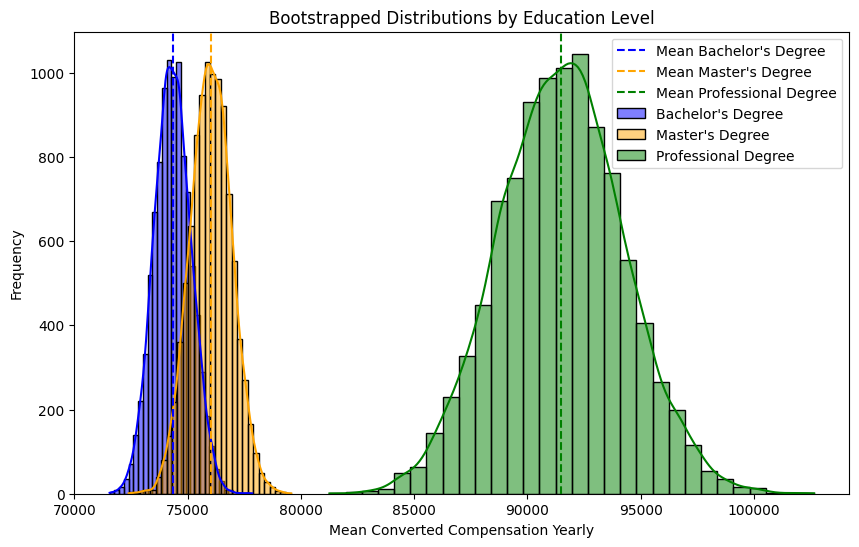

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(boot_means_bachelors, bins=30, color='blue', label="Bachelor's Degree", kde=True)
sns.histplot(boot_means_masters, bins=30, color='orange', label="Master's Degree", kde=True)
sns.histplot(boot_means_professional, bins=30, color='green', label="Professional Degree", kde=True)
plt.axvline(np.mean(boot_means_bachelors), color='blue', linestyle='--', label="Mean Bachelor's Degree")
plt.axvline(np.mean(boot_means_masters), color='orange', linestyle='--', label="Mean Master's Degree")
plt.axvline(np.mean(boot_means_professional), color='green', linestyle='--', label="Mean Professional Degree")
plt.title("Bootstrapped Distributions by Education Level")
plt.xlabel("Mean Converted Compensation Yearly")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Figure 2

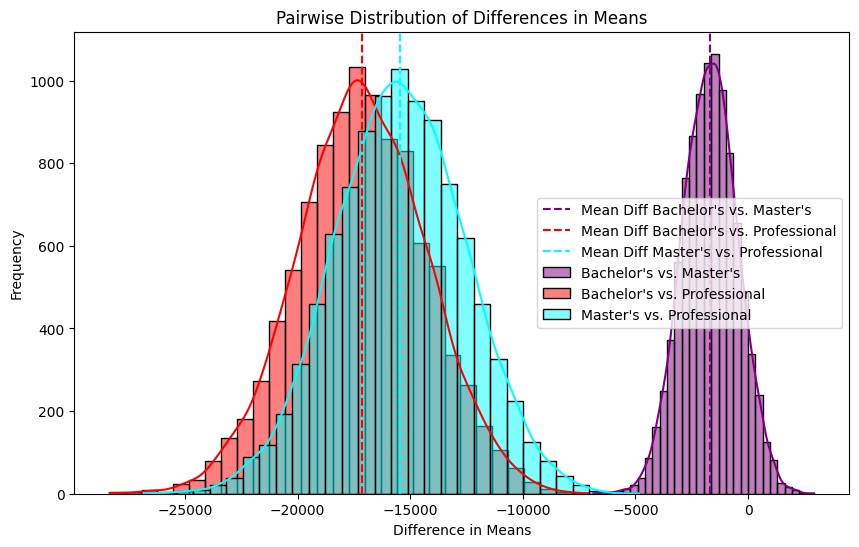

In [24]:
mean_diff_bm = np.mean(boot_diff_means_bm)
mean_diff_bp = np.mean(boot_diff_means_bp)
mean_diff_mp = np.mean(boot_diff_means_mp)


plt.figure(figsize=(10, 6))
sns.histplot(boot_diff_means_bm, bins=30, color='purple', label="Bachelor's vs. Master's", kde=True)
sns.histplot(boot_diff_means_bp, bins=30, color='red', label="Bachelor's vs. Professional", kde=True)
sns.histplot(boot_diff_means_mp, bins=30, color='cyan', label="Master's vs. Professional", kde=True)
plt.axvline(mean_diff_bm, color='purple', linestyle='--', label="Mean Diff Bachelor's vs. Master's")
plt.axvline(mean_diff_bp, color='red', linestyle='--', label="Mean Diff Bachelor's vs. Professional")
plt.axvline(mean_diff_mp, color='cyan', linestyle='--', label="Mean Diff Master's vs. Professional")
plt.title("Pairwise Distribution of Differences in Means")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Figure 3

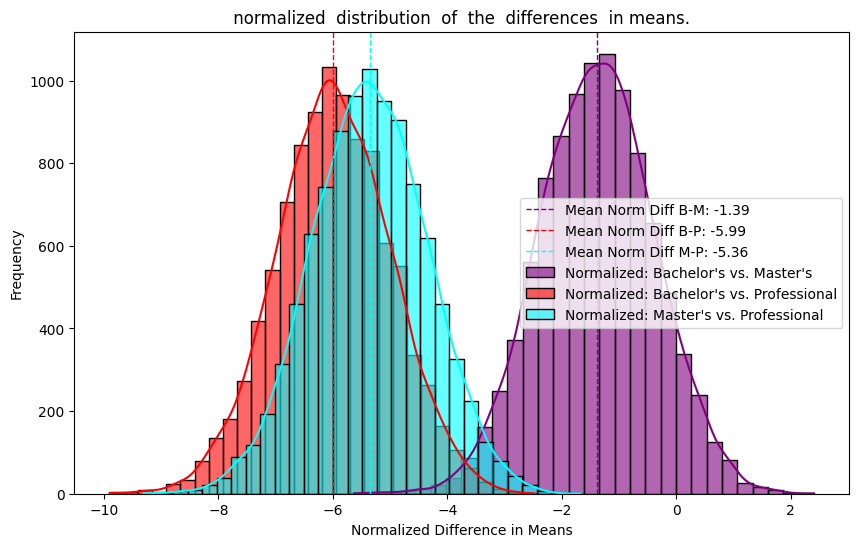

In [25]:
normalized_diff_means_bm = (boot_diff_means_bm/np.std(boot_diff_means_bm))
normalized_diff_means_bp = (boot_diff_means_bp/np.std(boot_diff_means_bp))
normalized_diff_means_mp = (boot_diff_means_mp/np.std(boot_diff_means_mp))

mean_standardized_diff_bm = np.mean(normalized_diff_means_bm)
mean_standardized_diff_bp = np.mean(normalized_diff_means_bp)
mean_standardized_diff_mp = np.mean(normalized_diff_means_mp)

plt.figure(figsize=(10, 6))
sns.histplot(normalized_diff_means_bm, bins=30, color='purple', kde=True, label="Normalized: Bachelor's vs. Master's", alpha=0.6)
sns.histplot(normalized_diff_means_bp, bins=30, color='red', kde=True, label="Normalized: Bachelor's vs. Professional", alpha=0.6)
sns.histplot(normalized_diff_means_mp, bins=30, color='cyan', kde=True, label="Normalized: Master's vs. Professional", alpha=0.6)

# Add axvlines for the mean of each normalized distribution
plt.axvline(mean_standardized_diff_bm, color='purple', linestyle='--', linewidth=1, label=f'Mean Norm Diff B-M: {mean_standardized_diff_bm:.2f}')
plt.axvline(mean_standardized_diff_bp, color='red', linestyle='--', linewidth=1, label=f'Mean Norm Diff B-P: {mean_standardized_diff_bp:.2f}')
plt.axvline(mean_standardized_diff_mp, color='cyan', linestyle='--', linewidth=1, label=f'Mean Norm Diff M-P: {mean_standardized_diff_mp:.2f}')

# Finalize plot
plt.title(" normalized  distribution  of  the  differences  in means. ")
plt.xlabel("Normalized Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Question 3 Part D

In [26]:
confidence_level = 0.95
lower_percentile = (1 - confidence_level) / 2 * 100
upper_percentile = (1 + confidence_level) / 2 * 100

conf_interval_bm = np.percentile(boot_diff_means_bm, [lower_percentile, upper_percentile])
conf_interval_bp = np.percentile(boot_diff_means_bp, [lower_percentile, upper_percentile])
conf_interval_mp = np.percentile(boot_diff_means_mp, [lower_percentile, upper_percentile])

print("Bootstrap 95% Confidence Intervals for Mean Differences:")
print(f"Bachelor's vs Master's: {conf_interval_bm}")
print(f"Bachelor's vs Professional: {conf_interval_bp}")
print(f"Master's vs Professional: {conf_interval_mp}")


if conf_interval_bm[0] > 0 or conf_interval_bm[1] < 0:
    print("Significant difference between Bachelor's and Master's degrees.")
else:
    print("No significant difference between Bachelor's and Master's degrees.")

if conf_interval_bp[0] > 0 or conf_interval_bp[1] < 0:
    print("Significant difference between Bachelor's and Professional degrees.")
else:
    print("No significant difference between Bachelor's and Professional degrees.")

if conf_interval_mp[0] > 0 or conf_interval_mp[1] < 0:
    print("Significant difference between Master's and Professional degrees.")
else:
    print("No significant difference between Master's and Professional degrees.")

Bootstrap 95% Confidence Intervals for Mean Differences:
Bachelor's vs Master's: [-4071.81476177   666.32028116]
Bachelor's vs Professional: [-22856.88618156 -11552.74369498]
Master's vs Professional: [-21124.18223682  -9870.96539766]
No significant difference between Bachelor's and Master's degrees.
Significant difference between Bachelor's and Professional degrees.
Significant difference between Master's and Professional degrees.


In [27]:
anova_bootstrap_result = stats.f_oneway(boot_means_bachelors, boot_means_masters, boot_means_professional)
print("Bootstrapped ANOVA Result:")
print("F-statistic:", anova_bootstrap_result.statistic)
print("p-value:", anova_bootstrap_result.pvalue)


Bootstrapped ANOVA Result:
F-statistic: 296913.96188972413
p-value: 0.0
